In [64]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
import networkx as nx


In [65]:
# Fall 2017 
# honors0 - Full Transparency 
# unal0- No Transparency
# unal1 - Solution Transparency 
# unal2 - Full Transparency


In [66]:
df1 = pd.read_csv("all_score_total.csv")


In [67]:
df_new2 = df1.loc[df1['hack id'] == 'unal0']
print(len(df_new2))
df_new2 = df1.loc[df1['hack id'] == 'unal1']
print(len(df_new2))
df_new2 = df1.loc[df1['hack id'] == 'unal2']
print(len(df_new2))
df_new2 = df1.loc[df1['hack id'] == 'honors0']
print(len(df_new2))

27
27
27
27


In [68]:
df1['total_diff1'] = df1['total_raw2'] - df1['total_raw1']
df1['total_diff2'] = df1['total_raw3'] - df1['total_raw2']
df1['total_diff3'] = df1['total_raw4'] - df1['total_raw3']
df1['total_diff4'] = df1['total_raw'] - df1['total_raw4']


In [69]:
df1['total_norm_diff1'] = df1['total_norm2'] - df1['total_norm1']
df1['total_norm_diff2'] = df1['total_norm3'] - df1['total_norm2']
df1['total_norm_diff3'] = df1['total_norm4'] - df1['total_norm3']
df1['total_norm_diff4'] = df1['total_norm'] - df1['total_norm4']

In [70]:
df1

,username,hack id,repo name,time,climate dataset,extra dataset used,extra dataset list,google api,location,using JS,...,total_norm1,total_norm_per1,total_diff1,total_diff2,total_diff3,total_diff4,total_norm_diff1,total_norm_diff2,total_norm_diff3,total_norm_diff4
0,mdecloedt,honors0,IH-Project-2017-mdecloedt_webapp_phase5,Wed Nov 22 08:30:39 2017,1,2,"Required Weather API, Zillow Home Value Search...",1,1,1,...,179.420290,59.26%,9,7,2,1,3.122034e+01,5.542580e+01,6.064101e+00,9.318117
1,Jordan-Loeser,honors0,IH-Project-2017-Jordan-Loeser_webapp_phase5,Wed Nov 22 08:30:39 2017,1,2,"Required Weather API, Zillow Home Value Search...",1,1,1,...,194.392041,85.19%,12,0,2,0,3.124902e+01,8.360502e+00,1.747345e+01,-16.766262
2,LukasMMarinovic,honors0,IH-Project-2017-LukasMMarinovic_webapp_phase5,Wed Nov 22 08:30:39 2017,1,1,"Required Weather API,",1,0,1,...,175.584075,55.56%,2,3,0,2,1.651996e+01,5.755117e-01,3.951444e-01,17.403568
3,whipplem123,honors0,IH-Project-2017-whipplem123_webapp_phase5,Wed Nov 22 08:30:39 2017,0,1,"Zillow Home Value Searching API,",1,1,1,...,158.695652,37.04%,2,4,3,0,1.613155e+01,3.952062e+01,-1.910750e+00,0.178616
4,SionHu,honors0,IH-Project-2017-SionHu_webapp_phase5,Wed Nov 22 08:30:39 2017,0,0,NaN,0,0,1,...,158.550725,33.33%,-3,0,0,0,-3.188406e+01,3.000000e-07,-3.000000e-07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,RafaelCruz15,unal2,IH-Project-2017-RafaelCruz15_webapp_phase5,Wed Nov 22 08:30:40 2017,0,0,NaN,0,0,1,...,192.638681,74.07%,2,-9,0,0,2.148749e+01,-8.745951e+01,-3.000000e-07,0.000000
104,gimg1859,unal2,IH-Project-2017-gimg1859_webapp_phase5,Wed Nov 22 08:30:40 2017,0,0,NaN,0,0,1,...,126.666667,0.00%,0,0,0,0,-3.000000e-07,3.000000e-07,-3.000000e-07,0.000000
105,jannMorenoJ,unal2,IH-Project-2017-jannMorenoJ_webapp_phase5,Wed Nov 22 08:30:40 2017,0,0,NaN,0,0,1,...,170.000000,55.56%,8,-12,0,0,3.697585e+01,-8.030918e+01,-3.000000e-07,0.000000
106,dahrojasca,unal2,IH-Project-2017-dahrojasca_webapp_phase5,Wed Nov 22 08:30:40 2017,0,0,NaN,1,1,1,...,146.875000,40.74%,-2,1,-1,5,-2.020833e+01,9.619347e+00,-9.619347e+00,45.750565


In [71]:
G_cool = pd.read_csv('Scores and Project Clicks Fall 2017.csv')
G_df = G_cool[G_cool['clicker_username'] != 'RCODI']
G_df

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
75,10/9/17,8:07 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
76,10/9/17,8:07 PM,NaN,show-code,/users/aldiazve/projects/ironhackstutorial/edi...,NaN,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
77,10/9/17,8:07 PM,NaN,open-file,http://www.ironhacks.com/users/aldiazve/projec...,index.html,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
78,10/9/17,8:07 PM,NaN,show-view,/users/aldiazve/projects/ironhackstutorial/pre...,NaN,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
79,10/9/17,8:07 PM,NaN,show-view,/users/aldiazve/projects/ironhackstutorial/pre...,NaN,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...
21942,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,map.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21943,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,moreNy.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21944,11/22/17,9:32 AM,61.085,view-project-time,/users/Anvido/projects/webapp_phase4,NaN,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21945,11/22/17,11:43 AM,NaN,show-view,/users/cglaitong/projects/webapp_phase4/previe...,NaN,phase5,cglaitong,cglaitong@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co


# Phase 5

In [72]:
phase5 = G_df.loc[G_df['phase'] == 'phase5']
phase5

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
17401,11/18/17,11:16 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase5,snugghash,snugghash@users.noreply.github.com,jmamaril25,jmamaril25@gmail.com
17402,11/18/17,11:16 PM,2.309,view-project-time,/users/snugghash/projects/webapp_phase4,NaN,phase5,snugghash,snugghash@users.noreply.github.com,jmamaril25,jmamaril25@gmail.com
17403,11/18/17,11:17 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase5,hihms,hwang123@purdue.edu,viswapurdue,balajiv@purdue.edu
17404,11/18/17,11:17 PM,NaN,show-view,/users/hihms/projects/webapp_phase4/preview/in...,NaN,phase5,hihms,hwang123@purdue.edu,viswapurdue,balajiv@purdue.edu
17405,11/18/17,11:17 PM,34.639,view-project-time,/users/hihms/projects/webapp_phase4,NaN,phase5,hihms,hwang123@purdue.edu,viswapurdue,balajiv@purdue.edu
...,...,...,...,...,...,...,...,...,...,...,...
21942,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,map.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21943,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,moreNy.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21944,11/22/17,9:32 AM,61.085,view-project-time,/users/Anvido/projects/webapp_phase4,NaN,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21945,11/22/17,11:43 AM,NaN,show-view,/users/cglaitong/projects/webapp_phase4/previe...,NaN,phase5,cglaitong,cglaitong@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co


# Honors0

In [73]:
df_new = df1.loc[df1['hack id'] == 'honors0']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase5.loc[phase5.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
17401,11/18/17,11:16 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase5,snugghash,snugghash@users.noreply.github.com,jmamaril25,jmamaril25@gmail.com
17402,11/18/17,11:16 PM,2.309,view-project-time,/users/snugghash/projects/webapp_phase4,NaN,phase5,snugghash,snugghash@users.noreply.github.com,jmamaril25,jmamaril25@gmail.com
17403,11/18/17,11:17 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase5,hihms,hwang123@purdue.edu,viswapurdue,balajiv@purdue.edu
17404,11/18/17,11:17 PM,NaN,show-view,/users/hihms/projects/webapp_phase4/preview/in...,NaN,phase5,hihms,hwang123@purdue.edu,viswapurdue,balajiv@purdue.edu
17405,11/18/17,11:17 PM,34.639,view-project-time,/users/hihms/projects/webapp_phase4,NaN,phase5,hihms,hwang123@purdue.edu,viswapurdue,balajiv@purdue.edu
...,...,...,...,...,...,...,...,...,...,...,...
21892,11/21/17,11:42 PM,NaN,open-file,http://www.ironhacks.com/users/jmamaril25/proj...,index.js,phase5,jmamaril25,jmamaril25@gmail.com,bzin22,bryanzin7@gmail.com
21893,11/21/17,11:42 PM,884.747,view-project-time,/users/jmamaril25/projects/webapp_phase4,NaN,phase5,jmamaril25,jmamaril25@gmail.com,Jordan-Loeser,jordlo@comcast.net
21894,11/21/17,11:42 PM,1158.562,view-project-time,/users/jmamaril25/projects/webapp_phase4,NaN,phase5,jmamaril25,jmamaril25@gmail.com,Jordan-Loeser,jordlo@comcast.net
21918,11/21/17,11:54 PM,NaN,open-file,http://www.ironhacks.com/users/jmamaril25/proj...,README.md,phase5,jmamaril25,jmamaril25@gmail.com,bzin22,bryanzin7@gmail.com


In [74]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

              index  click_times
0        jmamaril25          335
1       viswapurdue          189
2           gshowal           78
3              ko68          245
4            AkaGar          140
5           matson3           30
6         mdecloedt          355
7   LukasMMarinovic          122
8          nbraunec           72
9            bzin22          143
10    Jordan-Loeser           67
11       CampbellC2           70
12          ecottle            3
13      littlex2015           39
14      whipplem123            7
15          shivans           23
16      noah-curran          122
17          zhao744           50
18          lennwgs           20
19        GeoffYart           24


In [75]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff4'])
print(df_cool)

              index  click_times  match
0        jmamaril25          335      5
1       viswapurdue          189      2
2           gshowal           78      8
3              ko68          245      5
4            AkaGar          140      5
5           matson3           30      3
6         mdecloedt          355      1
7   LukasMMarinovic          122      2
8          nbraunec           72    -23
9            bzin22          143     15
10    Jordan-Loeser           67      0
11       CampbellC2           70     12
12          ecottle            3      0
13      littlex2015           39      1
14      whipplem123            7      0
15          shivans           23      0
16      noah-curran          122      1
17          zhao744           50     -2
18          lennwgs           20      0
19        GeoffYart           24     -1


Text(0.5, 1.0, 'Group: honors0 - Full Transparency')

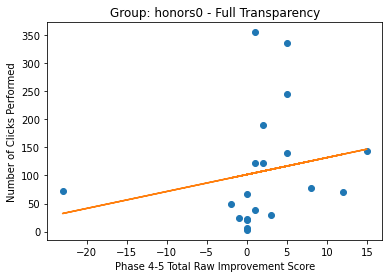

In [76]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 4-5 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: honors0 - Full Transparency')

# UNAL1

In [77]:
df_new = df1.loc[df1['hack id'] == 'unal1']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase5.loc[phase5.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
17619,11/18/17,11:44 PM,NaN,show-code,/users/jaleonro/projects/webapp_phase4/edit?re...,NaN,phase5,jaleonro,jaleonro@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17620,11/18/17,11:44 PM,NaN,open-file,http://www.ironhacks.com/users/jaleonro/projec...,index.html,phase5,jaleonro,jaleonro@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17621,11/18/17,11:44 PM,NaN,open-file,http://www.ironhacks.com/users/jaleonro/projec...,index.js,phase5,jaleonro,jaleonro@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17626,11/18/17,11:45 PM,54.293,view-project-time,/users/jaleonro/projects/webapp_phase4,NaN,phase5,jaleonro,jaleonro@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17629,11/18/17,11:45 PM,NaN,show-view,/users/garayf/projects/webapp_phase4/preview/i...,NaN,phase5,garayf,edgarayf@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
21924,11/22/17,12:02 AM,NaN,show-view,/users/Juankmilo97/projects/webapp_phase4/prev...,NaN,phase5,Juankmilo97,juancaropu123@outlook.com,davideperdomo,daeperdomocr@unal.edu.co
21925,11/22/17,12:02 AM,18.140,view-project-time,/users/Juankmilo97/projects/webapp_phase4,NaN,phase5,Juankmilo97,juancaropu123@outlook.com,davideperdomo,daeperdomocr@unal.edu.co
21926,11/22/17,12:17 AM,10583.896,view-project-time,/users/evilcucaracha/projects/webapp_phase4,NaN,phase5,evilcucaracha,rcbuelvasv@unal.edu.co,jdsolanos,jdsolanos@unal.edu.co
21945,11/22/17,11:43 AM,NaN,show-view,/users/cglaitong/projects/webapp_phase4/previe...,NaN,phase5,cglaitong,cglaitong@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co


In [78]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

              index  click_times
0     davideperdomo           98
1          ayperezc           10
2    BrandonAvilanR           92
3         jdsolanos           54
4    sebcamacho1703           65
5         cglaitong           33
6        Biopeligro          354
7        DaniCastel           85
8  JamerMejiaGarcia           57


In [79]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff4'])
print(df_cool)

              index  click_times  match
0     davideperdomo           98      7
1          ayperezc           10    -17
2    BrandonAvilanR           92      0
3         jdsolanos           54      2
4    sebcamacho1703           65     20
5         cglaitong           33     -4
6        Biopeligro          354      0
7        DaniCastel           85     15
8  JamerMejiaGarcia           57      0


Text(0.5, 1.0, 'Group: unal1 - Solution Transparency')

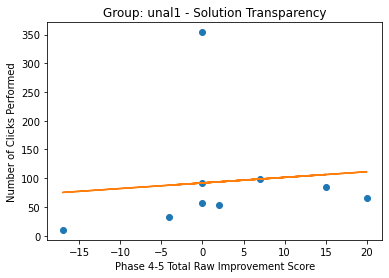

In [80]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 4-5 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal1 - Solution Transparency')

# UNAL2

In [81]:
df_new = df1.loc[df1['hack id'] == 'unal2']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase5.loc[phase5.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
17622,11/18/17,11:44 PM,185.277,view-project-time,/users/jsalcinar/projects/webapp_phase4,NaN,phase5,jsalcinar,jsalcinar@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17623,11/18/17,11:44 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase5,jdgaitanf,jdgaitanf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17624,11/18/17,11:45 PM,NaN,show-code,/users/jdgaitanf/projects/webapp_phase4/edit?r...,NaN,phase5,jdgaitanf,jdgaitanf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17625,11/18/17,11:45 PM,NaN,open-file,http://www.ironhacks.com/users/jdgaitanf/proje...,index.html,phase5,jdgaitanf,jdgaitanf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17627,11/18/17,11:45 PM,12.317,view-project-time,/users/jdgaitanf/projects/webapp_phase4,NaN,phase5,jdgaitanf,jdgaitanf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
21940,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,map.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21941,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,moreNy.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21942,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,map.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21943,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,moreNy.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co


In [82]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

               index  click_times
0         pahigueraf          103
1             Anvido           23
2      trickyjuggler           19
3   diefrodriguezcha          267
4       RafaelCruz15          207
5        GabrielUnal           23
6            bsdiaza           95
7        adcorredorm           58
8         csalfonsol          107
9          serbatero           84
10         federgolo           57
11     Jufcardenasmo           56
12          casc3798           42


In [83]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff4'])
print(df_cool)

               index  click_times  match
0         pahigueraf          103      6
1             Anvido           23     13
2      trickyjuggler           19     16
3   diefrodriguezcha          267     10
4       RafaelCruz15          207      0
5        GabrielUnal           23     -4
6            bsdiaza           95      0
7        adcorredorm           58     18
8         csalfonsol          107     12
9          serbatero           84      1
10         federgolo           57      7
11     Jufcardenasmo           56      0
12          casc3798           42     25


Text(0.5, 1.0, 'Group: unal2 - Full Transparency')

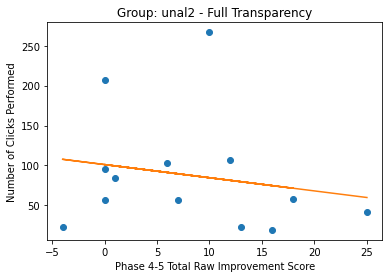

In [84]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 4-5 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal2 - Full Transparency')

# Phase 4 

In [85]:
phase4 = G_df.loc[G_df['phase'] == 'phase4']
phase4

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
13059,11/13/17,11:38 PM,NaN,score-click,NaN,NaN,phase4,trickyjuggler,ejjimenezc@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
13060,11/13/17,11:38 PM,NaN,score-click,NaN,NaN,phase4,serbatero,sisanchezp@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
13061,11/13/17,11:38 PM,NaN,score-click,NaN,NaN,phase4,StevenEsmar,stespinosama@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
13062,11/13/17,11:38 PM,NaN,score-click,NaN,NaN,phase4,pahigueraf,pahigueraf@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
13063,11/13/17,11:38 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,pahigueraf,pahigueraf@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...
17746,11/18/17,11:57 PM,NaN,open-file,http://www.ironhacks.com/users/GeoffYart/proje...,index.js,phase4,GeoffYart,nathanfei123@gmail.com,jmamaril25,jmamaril25@gmail.com
17747,11/18/17,11:57 PM,21.248,view-project-time,/users/GeoffYart/projects/webapp_phase4,NaN,phase4,GeoffYart,nathanfei123@gmail.com,jmamaril25,jmamaril25@gmail.com
17748,11/18/17,11:57 PM,NaN,score-click,NaN,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,jmamaril25,jmamaril25@gmail.com
17749,11/18/17,11:57 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,jmamaril25,jmamaril25@gmail.com


# Honors0

In [86]:
df_new = df1.loc[df1['hack id'] == 'honors0']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase4.loc[phase4.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
13076,11/13/17,11:39 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,nbraunec,noah.braunecker@gmail.com,ko68,ko68@purdue.edu
13077,11/13/17,11:39 PM,NaN,show-view,/users/nbraunec/projects/webapp_phase3/preview...,NaN,phase4,nbraunec,noah.braunecker@gmail.com,ko68,ko68@purdue.edu
13078,11/13/17,11:39 PM,NaN,show-view,/users/nbraunec/projects/webapp_phase3/preview...,NaN,phase4,nbraunec,noah.braunecker@gmail.com,ko68,ko68@purdue.edu
13079,11/13/17,11:39 PM,7.351,view-project-time,/users/nbraunec/projects/webapp_phase3,NaN,phase4,nbraunec,noah.braunecker@gmail.com,ko68,ko68@purdue.edu
13081,11/13/17,11:39 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,ko68,ko68@purdue.edu
...,...,...,...,...,...,...,...,...,...,...,...
17746,11/18/17,11:57 PM,NaN,open-file,http://www.ironhacks.com/users/GeoffYart/proje...,index.js,phase4,GeoffYart,nathanfei123@gmail.com,jmamaril25,jmamaril25@gmail.com
17747,11/18/17,11:57 PM,21.248,view-project-time,/users/GeoffYart/projects/webapp_phase4,NaN,phase4,GeoffYart,nathanfei123@gmail.com,jmamaril25,jmamaril25@gmail.com
17748,11/18/17,11:57 PM,NaN,score-click,NaN,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,jmamaril25,jmamaril25@gmail.com
17749,11/18/17,11:57 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,jmamaril25,jmamaril25@gmail.com


In [87]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

            index  click_times
0            ko68          187
1          bzin22           97
2      jmamaril25          262
3     viswapurdue          239
4         zhao744          221
5         matson3           99
6       mdecloedt          349
7         gshowal          167
8        nbraunec           57
9     littlex2015          194
10  Jordan-Loeser           83
11      GeoffYart           52
12         AkaGar           28
13    whipplem123          105
14        ecottle          186
15    noah-curran           10
16        lennwgs            3
17     CampbellC2           52


In [88]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff3'])
print(df_cool)

            index  click_times  match
0            ko68          187      0
1          bzin22           97      2
2      jmamaril25          262     11
3     viswapurdue          239     13
4         zhao744          221      0
5         matson3           99     -3
6       mdecloedt          349      2
7         gshowal          167     -1
8        nbraunec           57      7
9     littlex2015          194      6
10  Jordan-Loeser           83      2
11      GeoffYart           52     18
12         AkaGar           28      0
13    whipplem123          105      3
14        ecottle          186      0
15    noah-curran           10      3
16        lennwgs            3      0
17     CampbellC2           52     -2


Text(0.5, 1.0, 'Group: honors0 - Full Transparency')

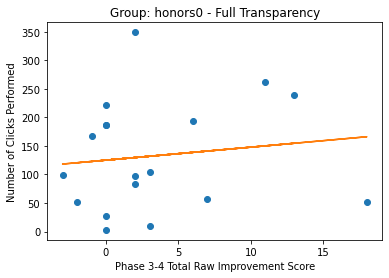

In [89]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 3-4 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: honors0 - Full Transparency')

In [90]:
df_new = df1.loc[df1['hack id'] == 'unal1']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase4.loc[phase4.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
13122,11/13/17,11:47 PM,NaN,show-view,/users/alejosaur/projects/webapp_phase3/previe...,NaN,phase4,alejosaur,asantamariap@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
13123,11/13/17,11:49 PM,67.781,view-project-time,/users/alejosaur/projects/webapp_phase3,NaN,phase4,alejosaur,asantamariap@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
13124,11/13/17,11:49 PM,NaN,show-view,/users/BrandonAvilanR/projects/webapp_phase3/p...,NaN,phase4,BrandonAvilanR,bsavilanr@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
13125,11/13/17,11:50 PM,NaN,show-view,/users/cglaitong/projects/webapp_phase3/previe...,NaN,phase4,cglaitong,cglaitong@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
13126,11/13/17,11:50 PM,88.703,view-project-time,/users/BrandonAvilanR/projects/webapp_phase3,NaN,phase4,BrandonAvilanR,bsavilanr@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
17692,11/18/17,11:49 PM,NaN,show-view,/users/jdsolanos/projects/webapp_phase4/previe...,NaN,phase4,jdsolanos,jdsolanos@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17698,11/18/17,11:49 PM,14.275,view-project-time,/users/jdsolanos/projects/webapp_phase4,NaN,phase4,jdsolanos,jdsolanos@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17699,11/18/17,11:49 PM,NaN,show-view,/users/gahormigag/projects/webapp_phase4/previ...,NaN,phase4,gahormigag,gahormigag@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17700,11/18/17,11:49 PM,2.925,view-project-time,/users/gahormigag/projects/webapp_phase4,NaN,phase4,gahormigag,gahormigag@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co


In [91]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

            index  click_times
0   davideperdomo          109
1  BrandonAvilanR          269
2      DaniCastel           24
3        ayperezc          176
4  sebcamacho1703           68
5       cglaitong           90
6       jdsolanos           22
7       nikolasto           21


In [92]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff3'])
print(df_cool)

            index  click_times  match
0   davideperdomo          109     11
1  BrandonAvilanR          269    -24
2      DaniCastel           24      4
3        ayperezc          176      4
4  sebcamacho1703           68     -4
5       cglaitong           90     10
6       jdsolanos           22      0
7       nikolasto           21     -5


Text(0.5, 1.0, 'Group: unal1 - Solution Transparency')

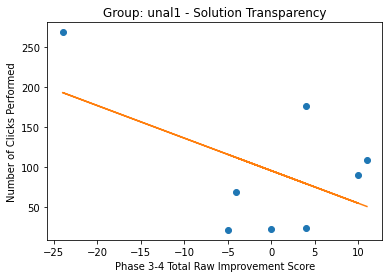

In [93]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 3-4 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal1 - Solution Transparency')

In [94]:
df_new = df1.loc[df1['hack id'] == 'unal2']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase4.loc[phase4.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
13101,11/13/17,11:42 PM,NaN,score-click,NaN,NaN,phase4,pahigueraf,pahigueraf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
13102,11/13/17,11:43 PM,NaN,score-click,NaN,NaN,phase4,casc3798,caasanchezcr@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
13108,11/13/17,11:43 PM,NaN,score-click,NaN,NaN,phase4,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
13109,11/13/17,11:43 PM,NaN,score-click,NaN,NaN,phase4,trickyjuggler,ejjimenezc@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
13111,11/13/17,11:43 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
17729,11/18/17,11:53 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,diefrodriguezcha,diefrodriguezcha@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17730,11/18/17,11:53 PM,NaN,show-code,/users/diefrodriguezcha/projects/webapp_phase4...,NaN,phase4,diefrodriguezcha,diefrodriguezcha@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17731,11/18/17,11:53 PM,NaN,open-file,http://www.ironhacks.com/users/diefrodriguezch...,index.html,phase4,diefrodriguezcha,diefrodriguezcha@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17732,11/18/17,11:53 PM,NaN,open-file,http://www.ironhacks.com/users/diefrodriguezch...,index.js,phase4,diefrodriguezcha,diefrodriguezcha@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co


In [95]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

               index  click_times
0         pahigueraf          489
1      trickyjuggler           39
2             Anvido          119
3   diefrodriguezcha           99
4        adcorredorm           32
5         anferoar96           67
6         dahrojasca          103
7          federgolo           17
8       DaveValencia           82
9        GabrielUnal           71
10         serbatero           35
11        csalfonsol           11


In [96]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff3'])
print(df_cool)

               index  click_times  match
0         pahigueraf          489      1
1      trickyjuggler           39      4
2             Anvido          119     11
3   diefrodriguezcha           99     51
4        adcorredorm           32      0
5         anferoar96           67      0
6         dahrojasca          103     -1
7          federgolo           17      7
8       DaveValencia           82      0
9        GabrielUnal           71      4
10         serbatero           35      4
11        csalfonsol           11     -2


Text(0.5, 1.0, 'Group: unal2 - Full Transparency')

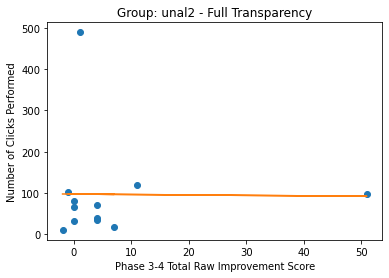

In [97]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 3-4 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal2 - Full Transparency')

# Phase 3

In [98]:
phase3 = G_df.loc[G_df['phase'] == 'phase3']
phase3

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
668,10/30/17,6:42 AM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase3,dcastanedar,dcastanedar@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
669,10/30/17,6:42 AM,NaN,show-code,/users/dcastanedar/projects/webapp_phase3/edit...,NaN,phase3,dcastanedar,dcastanedar@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
670,10/30/17,6:42 AM,NaN,open-file,http://www.ironhacks.com/users/dcastanedar/pro...,index.html,phase3,dcastanedar,dcastanedar@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
671,10/30/17,6:42 AM,NaN,show-view,/users/dcastanedar/projects/webapp_phase3/prev...,NaN,phase3,dcastanedar,dcastanedar@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
672,10/30/17,6:42 AM,3.301,view-project-time,/users/dcastanedar/projects/webapp_phase3,NaN,phase3,dcastanedar,dcastanedar@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...
13037,11/13/17,11:09 PM,25.994,view-project-time,/users/jmamaril25/projects/webapp_phase2,NaN,phase3,jmamaril25,jmamaril25@gmail.com,jmamaril25,jmamaril25@gmail.com
13038,11/13/17,11:32 PM,NaN,score-click,NaN,NaN,phase3,pahigueraf,pahigueraf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
13043,11/13/17,11:34 PM,668.685,view-project-time,/users/ayperezc/projects/webapp_phase2,NaN,phase3,ayperezc,ayperezc@unal.edu.co,ayperezc,ayperezc@unal.edu.co
13044,11/13/17,11:34 PM,668.587,view-project-time,/users/BrandonAvilanR/projects/webapp_phase2,NaN,phase3,BrandonAvilanR,bsavilanr@unal.edu.co,ayperezc,ayperezc@unal.edu.co


In [99]:
df_new = df1.loc[df1['hack id'] == 'honors0']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase3.loc[phase3.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
11739,11/11/17,3:30 PM,7038.921,view-project-time,/users/CampbellC2/projects/webapp_phase2,NaN,phase3,CampbellC2,campb341@purdue.edu,mdecloedt,mdecloed@purdue.edu
11782,11/11/17,3:47 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase3,Jordan-Loeser,jordlo@comcast.net,LukasMMarinovic,lukas@agramer.com
11784,11/11/17,3:47 PM,NaN,show-code,/users/Jordan-Loeser/projects/webapp_phase2/ed...,NaN,phase3,Jordan-Loeser,jordlo@comcast.net,LukasMMarinovic,lukas@agramer.com
11785,11/11/17,3:47 PM,NaN,open-file,http://www.ironhacks.com/users/Jordan-Loeser/p...,index.html,phase3,Jordan-Loeser,jordlo@comcast.net,LukasMMarinovic,lukas@agramer.com
11786,11/11/17,3:48 PM,NaN,show-view,/users/Jordan-Loeser/projects/webapp_phase2/pr...,NaN,phase3,Jordan-Loeser,jordlo@comcast.net,LukasMMarinovic,lukas@agramer.com
...,...,...,...,...,...,...,...,...,...,...,...
13033,11/13/17,11:09 PM,NaN,show-code,/users/jmamaril25/projects/webapp_phase2/edit?...,NaN,phase3,jmamaril25,jmamaril25@gmail.com,jmamaril25,jmamaril25@gmail.com
13034,11/13/17,11:09 PM,NaN,open-file,http://www.ironhacks.com/users/jmamaril25/proj...,index.html,phase3,jmamaril25,jmamaril25@gmail.com,jmamaril25,jmamaril25@gmail.com
13035,11/13/17,11:09 PM,NaN,open-file,http://www.ironhacks.com/users/jmamaril25/proj...,index.js,phase3,jmamaril25,jmamaril25@gmail.com,jmamaril25,jmamaril25@gmail.com
13036,11/13/17,11:09 PM,NaN,open-file,http://www.ironhacks.com/users/jmamaril25/proj...,style.css,phase3,jmamaril25,jmamaril25@gmail.com,jmamaril25,jmamaril25@gmail.com


# Honors0

In [100]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

              index  click_times
0         mdecloedt           19
1   LukasMMarinovic           27
2            bzin22           42
3       viswapurdue          199
4           zhao744           76
5              ko68            9
6           matson3           48
7            AkaGar           73
8           gshowal           38
9       noah-curran           22
10        GeoffYart            8
11         nbraunec           13
12       jmamaril25           38


In [101]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff2'])
print(df_cool)

              index  click_times  match
0         mdecloedt           19      7
1   LukasMMarinovic           27      3
2            bzin22           42     12
3       viswapurdue          199     -9
4           zhao744           76      0
5              ko68            9      0
6           matson3           48      6
7            AkaGar           73      5
8           gshowal           38     13
9       noah-curran           22      0
10        GeoffYart            8      0
11         nbraunec           13     16
12       jmamaril25           38     -1


Text(0.5, 1.0, 'Group: honors0 - Full Transparency')

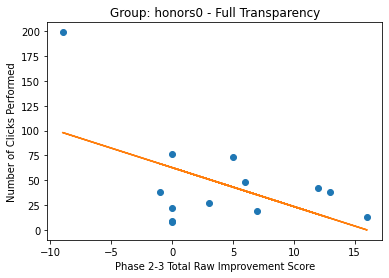

In [102]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 2-3 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: honors0 - Full Transparency')

# Unal1

In [103]:
df_new = df1.loc[df1['hack id'] == 'unal1']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase3.loc[phase3.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
12182,11/11/17,6:29 PM,NaN,show-view,/users/ayperezc/projects/webapp_phase2/preview...,NaN,phase3,ayperezc,ayperezc@unal.edu.co,nikolasto,nikolasto2094@hotmail.com
12183,11/11/17,6:29 PM,17.345,view-project-time,/users/ayperezc/projects/webapp_phase2,NaN,phase3,ayperezc,ayperezc@unal.edu.co,nikolasto,nikolasto2094@hotmail.com
12376,11/11/17,9:01 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase3,alejosaur,asantamariap@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
12377,11/11/17,9:01 PM,NaN,show-view,/users/alejosaur/projects/webapp_phase2/previe...,NaN,phase3,alejosaur,asantamariap@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
12504,11/11/17,10:47 PM,6337.629,view-project-time,/users/alejosaur/projects/webapp_phase2,NaN,phase3,alejosaur,asantamariap@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
12894,11/13/17,9:58 PM,3334.658,view-project-time,/users/BrandonAvilanR/projects/webapp_phase2,NaN,phase3,BrandonAvilanR,bsavilanr@unal.edu.co,ayperezc,ayperezc@unal.edu.co
12895,11/13/17,9:58 PM,3361.015,view-project-time,/users/jaleonro/projects/webapp_phase2,NaN,phase3,jaleonro,jaleonro@unal.edu.co,ayperezc,ayperezc@unal.edu.co
13043,11/13/17,11:34 PM,668.685,view-project-time,/users/ayperezc/projects/webapp_phase2,NaN,phase3,ayperezc,ayperezc@unal.edu.co,ayperezc,ayperezc@unal.edu.co
13044,11/13/17,11:34 PM,668.587,view-project-time,/users/BrandonAvilanR/projects/webapp_phase2,NaN,phase3,BrandonAvilanR,bsavilanr@unal.edu.co,ayperezc,ayperezc@unal.edu.co


In [104]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

            index  click_times
0       nikolasto            2
1   davideperdomo            7
2          garayf           21
3        ayperezc           72
4  BrandonAvilanR            9


In [105]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff2'])
print(df_cool)

            index  click_times  match
0       nikolasto            2      1
1   davideperdomo            7     17
2          garayf           21      6
3        ayperezc           72     12
4  BrandonAvilanR            9     14


Text(0.5, 1.0, 'Group: unal1 - Solution Transparency')

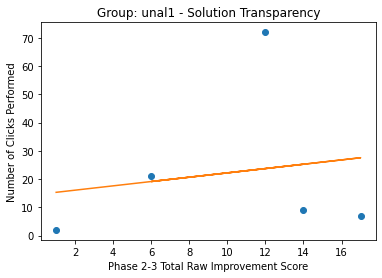

In [106]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 2-3 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal1 - Solution Transparency')

In [107]:
df_new = df1.loc[df1['hack id'] == 'unal2']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase3.loc[phase3.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
11740,11/11/17,3:38 PM,NaN,score-click,NaN,NaN,phase3,pahigueraf,pahigueraf@unal.edu.co,RafaelCruz15,ercruzr@unal.edu.co
11741,11/11/17,3:38 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase3,pahigueraf,pahigueraf@unal.edu.co,RafaelCruz15,ercruzr@unal.edu.co
11742,11/11/17,3:38 PM,NaN,score-click,NaN,NaN,phase3,serbatero,sisanchezp@unal.edu.co,RafaelCruz15,ercruzr@unal.edu.co
11743,11/11/17,3:38 PM,NaN,score-click,NaN,NaN,phase3,Jufcardenasmo,jufcardenasmo@unal.edu.co,RafaelCruz15,ercruzr@unal.edu.co
11744,11/11/17,3:38 PM,NaN,score-click,NaN,NaN,phase3,RafaelCruz15,ercruzr@unal.edu.co,RafaelCruz15,ercruzr@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
12900,11/13/17,10:56 PM,NaN,score-click,NaN,NaN,phase3,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
12914,11/13/17,11:02 PM,NaN,score-click,NaN,NaN,phase3,jdgaitanf,jdgaitanf@unal.edu.co,anferoar96,afromana@unal.edu.co
12915,11/13/17,11:03 PM,NaN,score-click,NaN,NaN,phase3,ironhacktech2,ironhacktech2@gmail.com,anferoar96,afromana@unal.edu.co
12916,11/13/17,11:03 PM,NaN,score-click,NaN,NaN,phase3,anferoar96,afromana@unal.edu.co,anferoar96,afromana@unal.edu.co


In [108]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

           index  click_times
0   RafaelCruz15           79
1     csalfonsol           17
2     anferoar96            6
3      serbatero           31
4    GabrielUnal           15
5     dahrojasca           28
6       gimg1859           27
7      jdgaitanf           35
8         Anvido            6
9      federgolo           17
10   FredyRosero            6
11    pahigueraf            1


In [109]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff2'])
print(df_cool)

           index  click_times  match
0   RafaelCruz15           79     -9
1     csalfonsol           17     -3
2     anferoar96            6      4
3      serbatero           31     -2
4    GabrielUnal           15      0
5     dahrojasca           28      1
6       gimg1859           27      0
7      jdgaitanf           35      4
8         Anvido            6      5
9      federgolo           17      3
10   FredyRosero            6     -9
11    pahigueraf            1     21


Text(0.5, 1.0, 'Group: unal2 - Full Transparency')

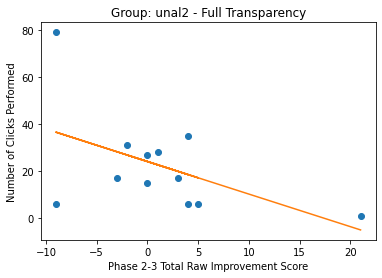

In [110]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 2-3 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal2 - Full Transparency')

# Phase 2

In [111]:
phase2 = G_df.loc[G_df['phase'] == 'phase2']
phase2

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
5775,11/6/17,12:00 PM,NaN,score-click,NaN,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5778,11/6/17,12:00 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5780,11/6/17,12:00 PM,NaN,show-view,/users/Jordan-Loeser/projects/webapp_phase1/pr...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5781,11/6/17,12:00 PM,NaN,show-code,/users/Jordan-Loeser/projects/webapp_phase1/ed...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5782,11/6/17,12:00 PM,NaN,open-file,http://www.ironhacks.com/users/Jordan-Loeser/p...,index.html,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
...,...,...,...,...,...,...,...,...,...,...,...
11734,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11735,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11736,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,map.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11737,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co


# Honors 0

In [112]:
df_new = df1.loc[df1['hack id'] == 'honors0']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase2.loc[phase2.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
5775,11/6/17,12:00 PM,NaN,score-click,NaN,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5778,11/6/17,12:00 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5780,11/6/17,12:00 PM,NaN,show-view,/users/Jordan-Loeser/projects/webapp_phase1/pr...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5781,11/6/17,12:00 PM,NaN,show-code,/users/Jordan-Loeser/projects/webapp_phase1/ed...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5782,11/6/17,12:00 PM,NaN,open-file,http://www.ironhacks.com/users/Jordan-Loeser/p...,index.html,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
...,...,...,...,...,...,...,...,...,...,...,...
11722,11/11/17,2:55 PM,4.432,view-project-time,/users/Jordan-Loeser/projects/webapp_phase2,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,Jordan-Loeser,jordlo@comcast.net
11723,11/11/17,2:57 PM,NaN,show-view,/users/jmamaril25/projects/webapp_phase2/previ...,NaN,phase2,jmamaril25,jmamaril25@gmail.com,bzin22,bryanzin7@gmail.com
11724,11/11/17,2:57 PM,NaN,show-code,/users/jmamaril25/projects/webapp_phase2/edit?...,NaN,phase2,jmamaril25,jmamaril25@gmail.com,bzin22,bryanzin7@gmail.com
11725,11/11/17,2:57 PM,NaN,open-file,http://www.ironhacks.com/users/jmamaril25/proj...,index.html,phase2,jmamaril25,jmamaril25@gmail.com,bzin22,bryanzin7@gmail.com


# Honors0

In [113]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

            index  click_times
0         zhao744           92
1          bzin22           70
2      jmamaril25           83
3         gshowal          114
4      CampbellC2            2
5       mdecloedt          509
6     viswapurdue          106
7     littlex2015           62
8        nbraunec          145
9            ko68           94
10        matson3          131
11      GeoffYart           62
12        ecottle           25
13        lennwgs            8
14  Jordan-Loeser           30
15    whipplem123            5


In [114]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff1'])
print(df_cool)

            index  click_times  match
0         zhao744           92     10
1          bzin22           70      4
2      jmamaril25           83     16
3         gshowal          114      0
4      CampbellC2            2      4
5       mdecloedt          509      9
6     viswapurdue          106      3
7     littlex2015           62      5
8        nbraunec          145     -1
9            ko68           94      5
10        matson3          131      2
11      GeoffYart           62      8
12        ecottle           25      3
13        lennwgs            8      0
14  Jordan-Loeser           30     12
15    whipplem123            5      2


Text(0.5, 1.0, 'Group: honors0 - Full Transparency')

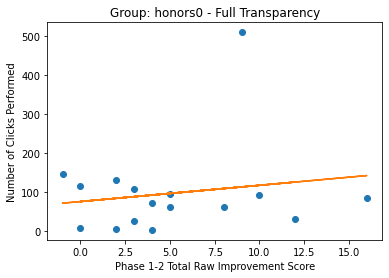

In [115]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 1-2 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: honors0 - Full Transparency')

# UNAL 1

In [116]:
df_new = df1.loc[df1['hack id'] == 'unal1']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase2.loc[phase2.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
8897,11/8/17,11:24 PM,NaN,show-view,/users/davideperdomo/projects/webapp_phase2/pr...,NaN,phase2,davideperdomo,daeperdomocr@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
8898,11/8/17,11:24 PM,10.786,view-project-time,/users/davideperdomo/projects/webapp_phase2,NaN,phase2,davideperdomo,daeperdomocr@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
8899,11/8/17,11:24 PM,NaN,show-view,/users/evilcucaracha/projects/webapp_phase2/pr...,NaN,phase2,evilcucaracha,rcbuelvasv@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
8900,11/8/17,11:25 PM,20.970,view-project-time,/users/evilcucaracha/projects/webapp_phase2,NaN,phase2,evilcucaracha,rcbuelvasv@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
8929,11/8/17,11:33 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,uxjudges3,uxjudges3@gmail.com,davideperdomo,daeperdomocr@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
11612,11/11/17,1:21 PM,4.277,view-project-time,/users/alejosaur/projects/webapp_phase2,NaN,phase2,alejosaur,asantamariap@unal.edu.co,BrandonAvilanR,bsavilanr@unal.edu.co
11613,11/11/17,1:21 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,BrandonAvilanR,bsavilanr@unal.edu.co,BrandonAvilanR,bsavilanr@unal.edu.co
11614,11/11/17,1:21 PM,NaN,show-view,/users/BrandonAvilanR/projects/webapp_phase2/p...,NaN,phase2,BrandonAvilanR,bsavilanr@unal.edu.co,BrandonAvilanR,bsavilanr@unal.edu.co
11618,11/11/17,1:21 PM,23.488,view-project-time,/users/BrandonAvilanR/projects/webapp_phase2,NaN,phase2,BrandonAvilanR,bsavilanr@unal.edu.co,BrandonAvilanR,bsavilanr@unal.edu.co


In [117]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

            index  click_times
0   davideperdomo          161
1      DaniCastel           33
2        xFortich           29
3  BrandonAvilanR           28
4       alejosaur           15
5       Saariasba           12
6        ayperezc           46
7   evilcucaracha            3
8  DavidsMartinez            8


In [118]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff1'])
print(df_cool)

            index  click_times  match
0   davideperdomo          161      2
1      DaniCastel           33      0
2        xFortich           29      8
3  BrandonAvilanR           28      5
4       alejosaur           15     26
5       Saariasba           12     -1
6        ayperezc           46      1
7   evilcucaracha            3      7
8  DavidsMartinez            8      0


Text(0.5, 1.0, 'Group: unal1 - Solution Transparency')

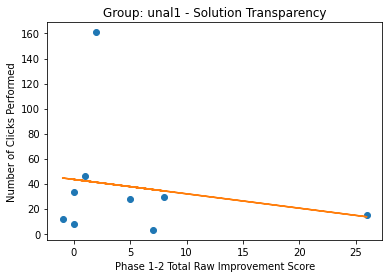

In [119]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 1-2 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal1 - Solution Transparency')

# UNAL 2

In [120]:
df_new = df1.loc[df1['hack id'] == 'unal2']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase2.loc[phase2.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
8444,11/8/17,10:47 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,jdgaitanf,jdgaitanf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
8446,11/8/17,10:47 PM,NaN,show-view,/users/jdgaitanf/projects/webapp_phase2/previe...,NaN,phase2,jdgaitanf,jdgaitanf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
8452,11/8/17,10:47 PM,20.401,view-project-time,/users/jdgaitanf/projects/webapp_phase2,NaN,phase2,jdgaitanf,jdgaitanf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
8454,11/8/17,10:47 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,buendiagon,daagonzalezbue@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
8455,11/8/17,10:47 PM,NaN,show-view,/users/buendiagon/projects/webapp_phase2/previ...,NaN,phase2,buendiagon,daagonzalezbue@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
11734,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11735,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11736,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,map.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11737,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co


In [121]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

               index  click_times
0         pahigueraf          214
1          serbatero          121
2             Anvido           58
3         anferoar96          115
4          jdgaitanf           19
5      trickyjuggler          193
6        adcorredorm           35
7          jsalcinar          141
8         csalfonsol          226
9      Jufcardenasmo            4
10      RafaelCruz15           50
11  diefrodriguezcha           24


In [122]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_diff1'])
print(df_cool)

               index  click_times  match
0         pahigueraf          214      6
1          serbatero          121      0
2             Anvido           58      6
3         anferoar96          115      3
4          jdgaitanf           19      4
5      trickyjuggler          193     15
6        adcorredorm           35      8
7          jsalcinar          141      2
8         csalfonsol          226      3
9      Jufcardenasmo            4      2
10      RafaelCruz15           50      2
11  diefrodriguezcha           24     -3


Text(0.5, 1.0, 'Group: unal2 - Full Transparency')

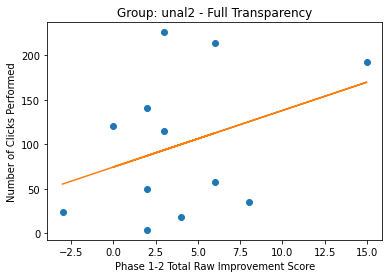

In [123]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 1-2 Total Raw Improvement Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal2 - Full Transparency')